In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
box_office = pd.read_csv('../data/clean_data/box_office_data.csv')
cast_and_crew1 = pd.read_csv('../data/clean_data/cast_and_crew1.csv')
cast_and_crew2 = pd.read_csv('../data/clean_data/cast_and_crew2.csv')
filming_locations = pd.read_csv('../data/clean_data/filming_locations.csv')
genre_sentiment = pd.read_csv('../data/clean_data/genre_sentiment.csv')
movie_level_data_with_sentiment = pd.read_csv('../data/clean_data/movie_level_data_with_sentiment.csv')
movie_level_data = pd.read_csv('../data/clean_data/movie_level_data.csv')
financial_info = pd.read_csv('../data/clean_data/financial_info.csv')

cast_and_crew = pd.concat([cast_and_crew1, cast_and_crew2], ignore_index=True)

In [3]:
box_office.shape

(8845, 4)

In [4]:
filming_locations.shape

(2500, 158)

In [5]:
movie_level_data.shape

(44860, 26)

In [6]:
movie_level_data_with_sentiment.shape

(460, 31)

In [7]:
box_office[box_office['Title'] == 'The Dark Knight']

,Title,Year,Worldwide_Box_Office,WBO_Adjusted_for_Inflation
5445,The Dark Knight,2008,1.003845e+09,1.834432e+09


In [8]:
movie_level_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568,1,2,10.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2863134,1,4,9.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,4.0
2,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2543775,1,1,9.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0
3,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350,1,2,7.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,2.0
4,tt0944947,tvSeries,Game of Thrones,Game of Thrones,0,2011,2019,60,"Action,Adventure,Drama",9.2,2276108,20,9,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0


In [9]:
cast_and_crew.head()

,tconst,ordering,nconst,category,job,characters,titleType,numVotes,averageRating,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]",short,2757,6.2,Charles Kayser,1878,1966,['actor'],\N
1,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]",short,2757,6.2,John Ott,1850,1931,['actor'],\N
2,tt0000005,3,nm0249379,producer,producer,\N,short,2757,6.2,Thomas A. Edison,1847,1931,"['producer', 'director', 'miscellaneous']","tt0361066,tt0242312,tt0004457,tt0001223"
3,tt0001223,7,nm0249379,producer,producer,\N,short,4716,6.4,Thomas A. Edison,1847,1931,"['producer', 'director', 'miscellaneous']","tt0361066,tt0242312,tt0004457,tt0001223"
4,tt0000010,1,nm0525910,director,\N,\N,short,7530,6.8,Louis Lumière,1864,1948,"['producer', 'director', 'cinematographer']","tt6231346,tt1167665,tt0000014,tt2461054"


In [10]:
filming_locations.head()

,tconst,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,location_10,location_11,location_12,location_13,location_14,location_15,location_16,location_17,location_18,location_19,location_20,location_21,location_22,location_23,location_24,location_25,location_26,location_27,location_28,location_29,location_30,location_31,location_32,location_33,location_34,location_35,location_36,location_37,location_38,location_39,location_40,location_41,location_42,location_43,location_44,location_45,location_46,location_47,location_48,location_49,location_50,location_51,location_52,location_53,location_54,location_55,location_56,location_57,location_58,location_59,location_60,location_61,location_62,location_63,location_64,location_65,location_66,location_67,location_68,location_69,location_70,location_71,location_72,location_73,location_74,location_75,location_76,location_77,location_78,location_79,location_80,location_81,location_82,location_83,location_84,location_85,location_86,location_87,location_88,location_89,location_90,location_91,location_92,location_93,location_94,location_95,location_96,location_97,location_98,location_99,location_100,location_101,location_102,location_103,location_104,location_105,location_106,location_107,location_108,location_109,location_110,location_111,location_112,location_113,location_114,location_115,location_116,location_117,location_118,location_119,location_120,location_121,location_122,location_123,location_124,location_125,location_126,location_127,location_128,location_129,location_130,location_131,location_132,location_133,location_134,location_135,location_136,location_137,location_138,location_139,location_140,location_141,location_142,location_143,location_144,location_145,location_146,location_147,location_148,location_149,location_150,location_151,location_152,location_153,location_154,location_155,location_156,location_157
0,tt0111161,"Mansfield Reformatory - 100 Reformatory Road, ...","Butler, Ohio, USA","Sandy Point, St. Croix, U.S. Virgin Islands","Malabar Farm State Park - 4050 Bromfield Road,...","127A Smithfield Road, Frederiksted, Virgin Isl...","Wyandot County Courthouse, Upper Sandusky, Ohi...","Ashland, Ohio, USA","193 North Main Street, Mansfield, Ohio, USA","Snyder Road and Hagerman Road, Bellville, Ohio...","Mansfield, Ohio, USA","Upper Sandusky, Ohio, USA","301 E 5th Street, Mansfield, Ohio, USA","Rod Bay, St Croix, USVI","Yuma, Arizona, USA","Bellville, Ohio, USA","Sandusky, Ohio, USA","Mansfield, Shelby, Ohio, USA","Ohio, USA","Arizona, USA",USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0468569,"Chicago, Illinois, USA","Battersea Power Station, Battersea, London, En...","Times Square, Causeway Bay, Hong Kong","Senate House, University College London, Malet...","Piccadilly Circus, Piccadilly, London, England...","Queen's Road Central, Central, Hong Kong, China","Millennium Station, Chicago, Illinois, USA",Twin Anchors Restaurant & Tavern - 1655 N. Sed...,"Hong Kong, China","Pinewood Studios, Iver Heath, Buckinghamshire,...","Victoria Harbour, Hong Kong, China","Brach's Candy Factory - 401 N. Cicero Street, ...","Bedford, Bedfordshire, England, UK","Lower Wacker Drive, Downtown, Chicago, Illinoi...","Chertsey, Surrey, England, UK",George Farmiloe Building - 28-36 St John Stree...,"South LaSalle St., Chicago, Illinois, USA","Old Post Office, Chicago, Illinois, USA","University of Westminster, London, England, UK","Atwood Cafe - 1

In [11]:
genre_sentiment.head()

,Category,Values
0,Biography,0.038096
1,Biography,-0.027905
2,Biography,0.044076
3,Biography,0.036501
4,Biography,0.094158


In [12]:
movie_level_data_with_sentiment.head()

,File Name,Content,script_len,polarity,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,Gamer,\r\n\r\n\r\n GAME...,230180,0.004451,1952,tt1034032,movie,Gamer,Gamer,0,2009,\N,95,"Action,Sci-Fi,Thriller",5.7,139478,2,2,7.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,0.0,2.0
1,No Country for Old Men,\r\n\r\n\r\n \r\n NO ...,189510,0.013795,71,tt0477348,movie,No Country for Old Men,No Country for Old Men,0,2007,\N,122,"Crime,Drama,Thriller",8.2,1057070,2,3,8.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,0.0,3.0
2,Bad Country,\r\n\r\n \r\n ...,217197,-0.019347,15659,tt2350892,movie,Bad Country,Bad Country,0,2014,\N,95,"Action,Crime,Drama",5.8,9320,1,4,9.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,4.0,1.0,0.0,4.0
3,17 Again,\r\n \r\n \r\n ...,200101,0.062805,1196,tt0974661,movie,17 Again,17 Again,0,2009,\N,102,"Comedy,Drama,Fantasy",6.4,215937,1,1,7.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0
4,Color of Night,\r\n\r\n\r\n ...,255873,0.121270,7789,tt0109456,movie,Color of Night,Color of Night,0,1994,\N,121,"Drama,Mystery,Romance",5.2,25709,1,2,8.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0


In [13]:
movie_level_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568,1,2,10.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2863134,1,4,9.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,4.0
2,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2543775,1,1,9.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0
3,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350,1,2,7.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,2.0
4,tt0944947,tvSeries,Game of Thrones,Game of Thrones,0,2011,2019,60,"Action,Adventure,Drama",9.2,2276108,20,9,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0


In [14]:
cast_and_crew.head()

,tconst,ordering,nconst,category,job,characters,titleType,numVotes,averageRating,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]",short,2757,6.2,Charles Kayser,1878,1966,['actor'],\N
1,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]",short,2757,6.2,John Ott,1850,1931,['actor'],\N
2,tt0000005,3,nm0249379,producer,producer,\N,short,2757,6.2,Thomas A. Edison,1847,1931,"['producer', 'director', 'miscellaneous']","tt0361066,tt0242312,tt0004457,tt0001223"
3,tt0001223,7,nm0249379,producer,producer,\N,short,4716,6.4,Thomas A. Edison,1847,1931,"['producer', 'director', 'miscellaneous']","tt0361066,tt0242312,tt0004457,tt0001223"
4,tt0000010,1,nm0525910,director,\N,\N,short,7530,6.8,Louis Lumière,1864,1948,"['producer', 'director', 'cinematographer']","tt6231346,tt1167665,tt0000014,tt2461054"


In [15]:
cast_and_crew.head()

,tconst,ordering,nconst,category,job,characters,titleType,numVotes,averageRating,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]",short,2757,6.2,Charles Kayser,1878,1966,['actor'],\N
1,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]",short,2757,6.2,John Ott,1850,1931,['actor'],\N
2,tt0000005,3,nm0249379,producer,producer,\N,short,2757,6.2,Thomas A. Edison,1847,1931,"['producer', 'director', 'miscellaneous']","tt0361066,tt0242312,tt0004457,tt0001223"
3,tt0001223,7,nm0249379,producer,producer,\N,short,4716,6.4,Thomas A. Edison,1847,1931,"['producer', 'director', 'miscellaneous']","tt0361066,tt0242312,tt0004457,tt0001223"
4,tt0000010,1,nm0525910,director,\N,\N,short,7530,6.8,Louis Lumière,1864,1948,"['producer', 'director', 'cinematographer']","tt6231346,tt1167665,tt0000014,tt2461054"


In [16]:
movie_level_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568,1,2,10.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2863134,1,4,9.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,4.0
2,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2543775,1,1,9.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0
3,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350,1,2,7.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,2.0
4,tt0944947,tvSeries,Game of Thrones,Game of Thrones,0,2011,2019,60,"Action,Adventure,Drama",9.2,2276108,20,9,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0


In [17]:
financial_info.head()


,tconst,budget,box_office
0,tt0111161,25000000.0,2.890662e+07
1,tt0468569,185000000.0,1.008487e+09
2,tt1375666,160000000.0,8.390306e+08
3,tt0137523,63000000.0,1.013201e+08
4,tt0109830,55000000.0,6.782265e+08


In [18]:
movie_level_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568,1,2,10.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2863134,1,4,9.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,4.0
2,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2543775,1,1,9.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0
3,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350,1,2,7.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,2.0
4,tt0944947,tvSeries,Game of Thrones,Game of Thrones,0,2011,2019,60,"Action,Adventure,Drama",9.2,2276108,20,9,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0


In [19]:
financial_movie_level = pd.merge(financial_info,movie_level_data,on='tconst')
financial_movie_level['ratio'] = financial_movie_level['box_office']/financial_movie_level['budget']

In [20]:
financial_movie_level.head()

,tconst,budget,box_office,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer,ratio
0,tt0111161,25000000.0,2.890662e+07,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568,1,2,10.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.156265
1,tt0468569,185000000.0,1.008487e+09,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2863134,1,4,9.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,4.0,5.451280
2,tt1375666,160000000.0,8.390306e+08,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2543775,1,1,9.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,5.243941
3,tt0137523,63000000.0,1.013201e+08,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350,1,2,7.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,2.0,1.608256
4,tt0109830,55000000.0,6.782265e+08,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance",8.8,2250065,1,2,7.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,2.0,12.331390


# Genre BoxOffice/Budget

In [21]:
# Assuming 'new_merge' is a DataFrame that includes a 'genres', 'polarity', and 'year' columns
# Suppose genres are a comma-separated list of genres in each 'genres' entry of new_merge

temp = financial_movie_level[financial_movie_level['titleType'] == 'movie']

# Split and expand the 'genres' into a set of unique genres
genres = set(sum(temp['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary to hold DataFrames for each genre
dfs_dict = {}

# Loop through each genre and filter entries that include this genre, then select 'polarity' and 'year'
for name in genres:
    # Using str.contains safely with regex=False to avoid unexpected regex behavior
    ratings_df = temp[temp['genres'].str.contains(name, regex=False)][['ratio', 'startYear']]
    dfs_dict[name] = ratings_df

# Initialize an empty DataFrame to store the long-format data
df_long = pd.DataFrame()

# Populate the DataFrame by melting each genre-specific DataFrame into a long format
for genre, df in dfs_dict.items():
    df['Category'] = genre  # Add a 'Category' column to each DataFrame
    df_long = pd.concat([df_long, df], ignore_index=True)

# Rename the columns explicitly to ensure clarity
df_long.rename(columns={'ratio': 'Box Office/Budget Ratio', 'startYear': 'Year'}, inplace=True)

import numpy as np
revenue_group = df_long.groupby(['Year','Category'])[['Box Office/Budget Ratio']].mean().reset_index()
revenue_group[revenue_group['Year'] == 2023].sort_values(['Box Office/Budget Ratio'], ascending=False)

,Year,Category,Box Office/Budget Ratio
949,2023,Biography,9.323039
948,2023,Animation,8.051247
956,2023,Horror,5.464111
955,2023,History,5.243365
951,2023,Crime,4.988622
954,2023,Fantasy,4.757121
950,2023,Comedy,4.661533
952,2023,Drama,4.271508
957,2023,Mystery,3.782758
953,2023,Family,3.668462


# Genre / Box Office Group

In [22]:
# Assuming 'new_merge' is a DataFrame that includes a 'genres', 'polarity', and 'year' columns
# Suppose genres are a comma-separated list of genres in each 'genres' entry of new_merge

temp = financial_movie_level[financial_movie_level['titleType'] == 'movie']

# Split and expand the 'genres' into a set of unique genres
genres = set(sum(temp['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary to hold DataFrames for each genre
dfs_dict = {}

# Loop through each genre and filter entries that include this genre, then select 'polarity' and 'year'
for name in genres:
    # Using str.contains safely with regex=False to avoid unexpected regex behavior
    ratings_df = temp[temp['genres'].str.contains(name, regex=False)][['box_office', 'startYear']]
    dfs_dict[name] = ratings_df

# Initialize an empty DataFrame to store the long-format data
df_long = pd.DataFrame()

# Populate the DataFrame by melting each genre-specific DataFrame into a long format
for genre, df in dfs_dict.items():
    df['Category'] = genre  # Add a 'Category' column to each DataFrame
    df_long = pd.concat([df_long, df], ignore_index=True)

# Rename the columns explicitly to ensure clarity
df_long.rename(columns={'box_office': 'Box Office', 'startYear': 'Year'}, inplace=True)

box_group = df_long.groupby(['Year','Category'])[['Box Office']].mean().reset_index()
box_group[box_group['Year'] == 2023].sort_values(['Box Office'], ascending=False)

,Year,Category,Box Office
948,2023,Animation,9.292358e+08
954,2023,Fantasy,6.231805e+08
953,2023,Family,6.009643e+08
955,2023,History,5.635932e+08
950,2023,Comedy,4.918920e+08
947,2023,Adventure,4.547813e+08
959,2023,Sci-Fi,3.839631e+08
949,2023,Biography,3.604411e+08
946,2023,Action,3.083790e+08
951,2023,Crime,2.377464e+08


# Most Made Movies

In [24]:
# Assuming 'new_merge' is a DataFrame that includes a 'genres', 'polarity', and 'year' columns
# Suppose genres are a comma-separated list of genres in each 'genres' entry of new_merge

temp = movie_level_data[movie_level_data['titleType'] == 'movie']

# Split and expand the 'genres' into a set of unique genres
genres = set(sum(temp['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary to hold DataFrames for each genre
dfs_dict = {}

# Loop through each genre and filter entries that include this genre, then select 'polarity' and 'year'
for name in genres:
    # Using str.contains safely with regex=False to avoid unexpected regex behavior
    ratings_df = temp[temp['genres'].str.contains(name, regex=False)][['averageRating', 'startYear']]
    dfs_dict[name] = ratings_df

# Initialize an empty DataFrame to store the long-format data
df_long = pd.DataFrame()

# Populate the DataFrame by melting each genre-specific DataFrame into a long format
for genre, df in dfs_dict.items():
    df['Category'] = genre  # Add a 'Category' column to each DataFrame
    df_long = pd.concat([df_long, df], ignore_index=True)

# Rename the columns explicitly to ensure clarity
df_long.rename(columns={'averageRating': 'averageRating', 'startYear': 'Year'}, inplace=True)

df_long[df_long['Year']==2023].groupby(['Category']).size().sort_values(ascending=False)

Category
Drama          362
Comedy         221
Action         193
Thriller       170
Crime          110
Adventure       87
Romance         85
Horror          84
Mystery         60
Biography       44
History         36
Documentary     30
Family          29
Sci-Fi          28
Animation       26
Fantasy         23
Sport           19
Music           18
Musical          8
War              7
Western          1
\N               1
dtype: int64

# Runtime Ranking

In [27]:
# Use to_numeric to convert column 'A', handling non-numeric values
movie_level_data['runtimeMinutes'] = pd.to_numeric(movie_level_data['runtimeMinutes'], errors='coerce')

# Optionally replace NaN with a specific integer (e.g., 0)
movie_level_data['runtimeMinutes'] = movie_level_data['runtimeMinutes'].fillna(0).astype(int)

# Assuming 'new_merge' is a DataFrame that includes a 'genres', 'polarity', and 'year' columns
# Suppose genres are a comma-separated list of genres in each 'genres' entry of new_merge

temp = movie_level_data[movie_level_data['titleType'] == 'movie']
temp['runtimeMinutes'] = pd.to_numeric(temp['runtimeMinutes'], errors='coerce')
temp['runtimeMinutes'] = temp['runtimeMinutes'].fillna(0).astype(int)


# Split and expand the 'genres' into a set of unique genres
genres = set(sum(temp['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary to hold DataFrames for each genre
dfs_dict = {}

# Loop through each genre and filter entries that include this genre, then select 'polarity' and 'year'
for name in genres:
    # Using str.contains safely with regex=False to avoid unexpected regex behavior
    ratings_df = temp[temp['genres'].str.contains(name, regex=False)][['runtimeMinutes', 'startYear']]
    dfs_dict[name] = ratings_df

# Initialize an empty DataFrame to store the long-format data
df_long = pd.DataFrame()

# Populate the DataFrame by melting each genre-specific DataFrame into a long format
for genre, df in dfs_dict.items():
    df['Category'] = genre  # Add a 'Category' column to each DataFrame
    df_long = pd.concat([df_long, df], ignore_index=True)

# Rename the columns explicitly to ensure clarity
df_long.rename(columns={'runtimeMinutes': 'runtimeMinutes', 'startYear': 'Year'}, inplace=True)

box_group = df_long.groupby(['Year','Category'])[['runtimeMinutes']].mean().reset_index()
box_group[box_group['Year'] == 2023].sort_values(['runtimeMinutes'], ascending=False)

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_4984\2866309826.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['runtimeMinutes'] = pd.to_numeric(temp['runtimeMinutes'], errors='coerce')
C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_4984\2866309826.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['runtimeMinutes'] = temp['runtimeMinutes'].fillna(0).astype(int)


,Year,Category,runtimeMinutes
2023,2023,\N,137.000000
2015,2023,Musical,135.125000
2002,2023,Action,126.000000
2014,2023,Music,124.500000
2012,2023,History,123.861111
2007,2023,Crime,123.800000
2009,2023,Drama,122.773481
2005,2023,Biography,122.113636
2003,2023,Adventure,119.206897
2019,2023,Sport,118.052632


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json


# Assuming 'new_merge' is a DataFrame that includes a 'genres', 'polarity', and 'year' columns
# Suppose genres are a comma-separated list of genres in each 'genres' entry of new_merge

temp = movie_level_data[movie_level_data['titleType'] == 'movie']

# Split and expand the 'genres' into a set of unique genres
genres = set(sum(temp['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary to hold DataFrames for each genre
dfs_dict = {}

# Loop through each genre and filter entries that include this genre, then select 'polarity' and 'year'
for name in genres:
    # Using str.contains safely with regex=False to avoid unexpected regex behavior
    ratings_df = temp[temp['genres'].str.contains(name, regex=False)][['averageRating', 'startYear']]
    dfs_dict[name] = ratings_df

# Initialize an empty DataFrame to store the long-format data
df_long = pd.DataFrame()

# Populate the DataFrame by melting each genre-specific DataFrame into a long format
for genre, df in dfs_dict.items():
    df['Category'] = genre  # Add a 'Category' column to each DataFrame
    df_long = pd.concat([df_long, df], ignore_index=True)

# Rename the columns explicitly to ensure clarity
df_long.rename(columns={'averageRating': 'Average Rating', 'startYear': 'Year'}, inplace=True)

# Now df_long is ready and includes 'Category', 'Polarity', and 'Year'
temp = df_long.groupby(['Category','Year'])['Average Rating'].mean().reset_index()
temp = temp[temp['Category'].isin(['Adventure','Drama','Romance','Thriller','Comedy'])]
temp = temp[(temp['Year'] >= 1950) & (temp['Year'] < 2024)]
temp['Average Rating'] = temp['Average Rating'].round(2)

pivoted_df = temp.pivot(index='Year', columns='Category', values='Average Rating')
pivoted_df = pivoted_df.reset_index()
pivoted_df.to_csv('./test.csv', index_label=False)
test = pd.read_csv('./test.csv', index_col=None)
test.to_json('rating.json', orient = 'records',lines=True)

data = []
with open('rating.json', 'r') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

with open('averageRating.json', 'w') as file:
    json.dump(data, file, indent=4)

In [29]:
import json 
movie_cast = cast_and_crew[['tconst','nconst','category']]
movie_year = movie_level_data[(movie_level_data['titleType'] == 'movie') & (movie_level_data['startYear'] < 2024) & (movie_level_data['startYear'] > 1950)][['tconst','startYear']]
movie_cast_unique = pd.merge(movie_year, movie_cast, on='tconst', how='inner')
unique_counts = movie_cast_unique.groupby(['startYear','category'])['nconst'].nunique().reset_index(name='unique_nconsts')

In [30]:
import json 

movie_cast = cast_and_crew[['tconst','nconst']]
movie_year = movie_level_data[(movie_level_data['titleType'] == 'movie') & (movie_level_data['startYear'] < 2024) & (movie_level_data['startYear'] > 1950)][['tconst','startYear']]
movie_cast_unique = pd.merge(movie_year, movie_cast, on='tconst', how='inner')

unique_counts = movie_cast_unique.groupby(['startYear'])['nconst'].nunique().reset_index(name='unique_nconsts')
unique_counts.rename(columns={'startYear': 'Year', 'unique_nconsts': 'Number of Actors'}, inplace=True)
unique_counts.to_json('temp.json', orient = 'records',lines=True)

data = []
with open('temp.json', 'r') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

with open('movie_actor_output.json', 'w') as file:
    json.dump(data, file, indent=4)


In [31]:
unique_counts

,Year,Number of Actors
0,1951,923
1,1952,891
2,1953,924
3,1954,948
4,1955,1374
...,...,...
68,2019,15185
69,2020,12641
70,2021,12595
71,2022,13294


<Axes: xlabel='Year', ylabel='Number of Actors'>

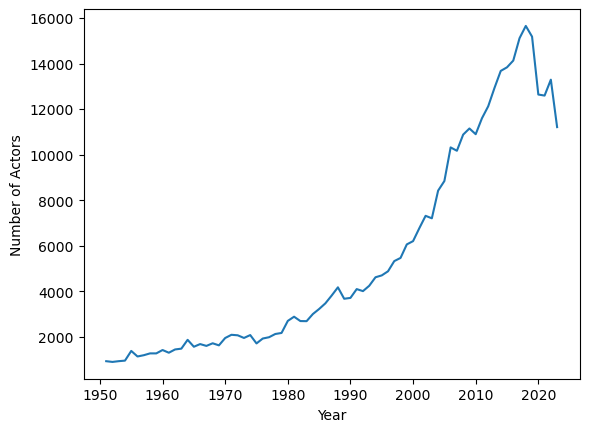

In [32]:
sns.lineplot(x = 'Year',y='Number of Actors',data = unique_counts)

<Axes: xlabel='Year', ylabel='WBO_Adjusted_for_Inflation'>

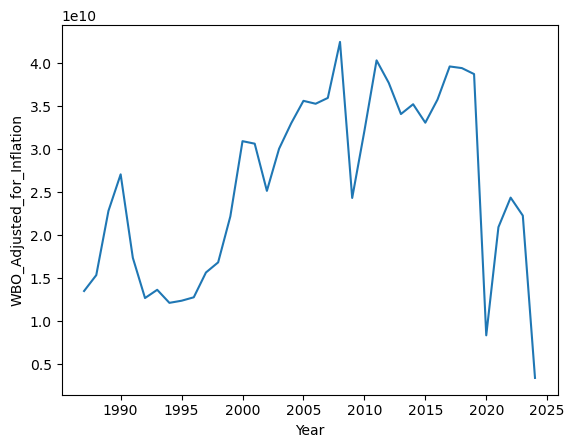

In [33]:
import numpy as np

average_revenue = box_office.groupby('Year')['WBO_Adjusted_for_Inflation'].sum().reset_index()
average_revenue = average_revenue[10:]

sns.lineplot(x = 'Year',y = 'WBO_Adjusted_for_Inflation',data = average_revenue)

In [34]:
inter = np.intersect1d(movie_level_data['primaryTitle'] + movie_level_data['startYear'].astype('string'),box_office['Title']+box_office['Year'].astype('string'))

temp = box_office[(box_office['Title'] + box_office['Year'].astype('string')).isin(inter)]
box_movie = temp[temp.duplicated(['Title','Year'])==False]

temp = movie_level_data[(movie_level_data['primaryTitle'] + movie_level_data['startYear'].astype('string')).isin(inter)]
movie_box = temp[temp.duplicated(['primaryTitle','startYear'])==False]

df_merged = pd.merge(movie_box, box_movie, left_on=['primaryTitle', 'startYear'], right_on=['Title','Year'],  how='inner')
df_merged['tot_act'] = df_merged['actor']+df_merged['actress']

# Calculate Q1 and Q3
Q1 = df_merged['WBO_Adjusted_for_Inflation'].quantile(0.25)
Q3 = df_merged['WBO_Adjusted_for_Inflation'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = df_merged[(df_merged['WBO_Adjusted_for_Inflation'] >= lower_bound) & (df_merged['WBO_Adjusted_for_Inflation'] <= upper_bound)]


In [35]:
filtered_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer,Title,Year,Worldwide_Box_Office,WBO_Adjusted_for_Inflation,tot_act
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568,1,2,10.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,The Shawshank Redemption,1994,28343927.0,6.139749e+07,10.0
3,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350,1,2,7.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,2.0,Fight Club,1999,100853753.0,1.733413e+08,10.0
5,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,2213165,1,2,7.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,Pulp Fiction,1994,107968758.0,2.338777e+08,10.0
11,tt0114369,movie,Se7en,Se7en,0,1995,\N,127,"Crime,Drama,Mystery",8.6,1793469,1,1,9.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,Se7en,1995,100125643.0,2.236509e+08,10.0
15,tt0361748,movie,Inglourious Basterds,Inglourious Basterds,0,2009,\N,153,"Adventure,Drama,War",8.4,1579459,1,1,8.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,Inglourious Basterds,2009,321455689.0,3.045278e+08,10.0


In [36]:
import json

movie_num_df = movie_level_data.groupby(['startYear']).size().reset_index()
movie_num_df = movie_num_df[(movie_num_df['startYear']>1950) & (movie_num_df['startYear']<2024)]
movie_num_df.rename(columns={'startYear': 'Year', 0: 'Number of Movies'}, inplace=True)

movie_num_df.to_json('movie_size.json', orient = 'records',lines=True)

data = []
with open('movie_size.json', 'r') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

with open('movie_size_output.json', 'w') as file:
    json.dump(data, file, indent=4)

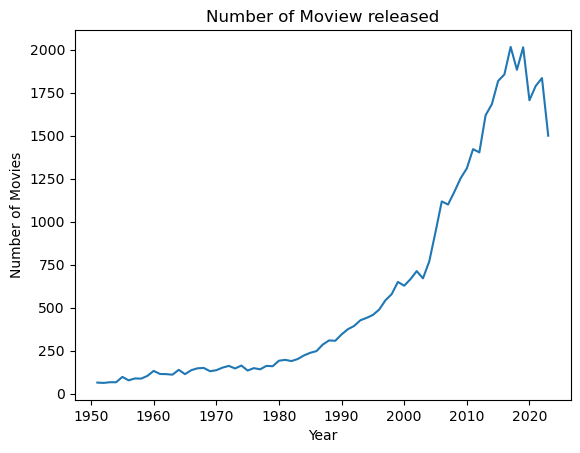

In [37]:
sns.lineplot(x = 'Year', y = 'Number of Movies',data = movie_num_df)
plt.title('Number of Moview released')
plt.show()

In [38]:
movie_level_data_with_sentiment.columns

Index(['File Name', 'Content', 'script_len', 'polarity', 'index', 'tconst',
       'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes',
       'numDirectors', 'numWriters', 'actor', 'actress', 'archive_footage',
       'archive_sound', 'casting_director', 'cinematographer', 'composer',
       'director', 'editor', 'producer', 'production_designer', 'self',
       'writer'],
      dtype='object')

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_merge' is a DataFrame that includes a 'genres', 'polarity', and 'year' columns
# Suppose genres are a comma-separated list of genres in each 'genres' entry of new_merge

# Split and expand the 'genres' into a set of unique genres
genres = set(sum(movie_level_data_with_sentiment['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary to hold DataFrames for each genre
dfs_dict = {}

# Loop through each genre and filter entries that include this genre, then select 'polarity' and 'year'
for name in genres:
    # Using str.contains safely with regex=False to avoid unexpected regex behavior
    sentiment_df = movie_level_data_with_sentiment[movie_level_data_with_sentiment['genres'].str.contains(name, regex=False)][['polarity', 'startYear']]
    dfs_dict[name] = sentiment_df

# Initialize an empty DataFrame to store the long-format data
df_long = pd.DataFrame()

# Populate the DataFrame by melting each genre-specific DataFrame into a long format
for genre, df in dfs_dict.items():
    df['Category'] = genre  # Add a 'Category' column to each DataFrame
    df_long = pd.concat([df_long, df], ignore_index=True)

# Rename the columns explicitly to ensure clarity
df_long.rename(columns={'polarity': 'Polarity', 'startyear': 'Year'}, inplace=True)


# Now df_long is ready and includes 'Category', 'Polarity', and 'Year'
import json

temp = df_long.groupby(['Category','startYear'])['Polarity'].mean().reset_index()
temp = temp[temp['startYear'].isin([2010,2020])].sort_values('Category')
temp = temp.groupby('Category').filter(lambda x: len(x) >= 2).sort_values('Category')
temp['Polarity'] = temp['Polarity'].round(3)
pivoted_df = temp.pivot(index='Category', columns='startYear', values='Polarity')
pivoted_df = pivoted_df.reset_index()
pivoted_df.to_csv('./test.csv', index_label=False)
test = pd.read_csv('./test.csv', index_col=None)
test.to_json('temp.json', orient = 'records',lines=True)

data = []
with open('temp.json', 'r') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

with open('sentiment.json', 'w') as file:
    json.dump(data, file, indent=4)

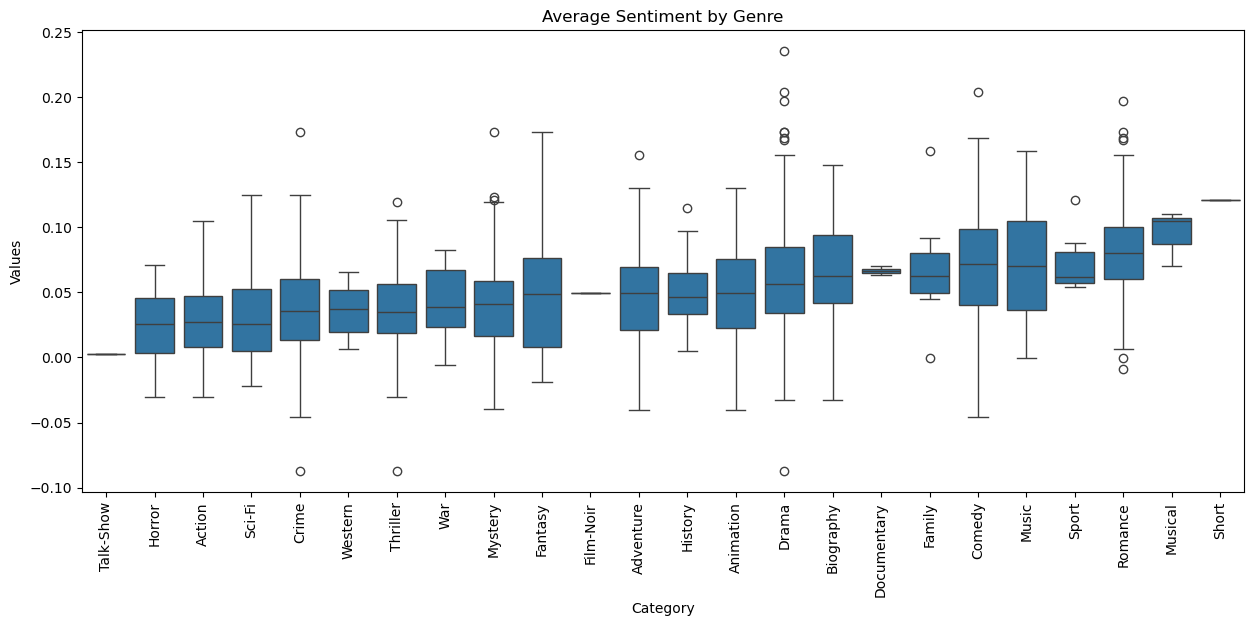

In [40]:
# Calculate mean values for each category
mean_values = genre_sentiment.groupby('Category')['Values'].mean().reset_index()

# Sort the categories based on their mean values
sorted_categories = mean_values.sort_values('Values')['Category']

# Plot the boxplot with seaborn, ordering the categories by their mean values
plt.figure(figsize=(15, 6))  # Set figure size
sns.boxplot(x='Category', y='Values', data=genre_sentiment, order=sorted_categories)
plt.xticks(rotation=90)
plt.title('Average Sentiment by Genre')
plt.show()

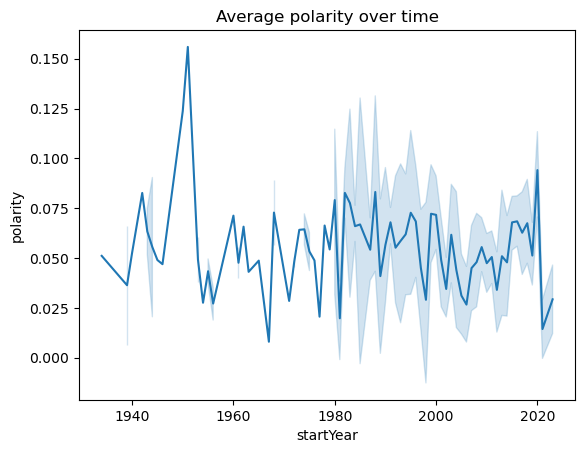

In [41]:
sns.lineplot(x = 'startYear', y = 'polarity', estimator=np.mean, data = movie_level_data_with_sentiment)
plt.title('Average polarity over time')
plt.show()

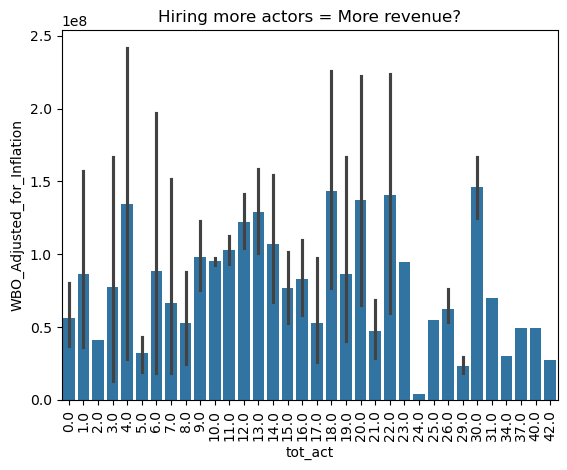

In [42]:
sns.barplot(x='tot_act',y='WBO_Adjusted_for_Inflation',data=filtered_df, estimator = np.mean)
plt.xticks(rotation=90)
plt.title('Hiring more actors = More revenue?')
plt.show()

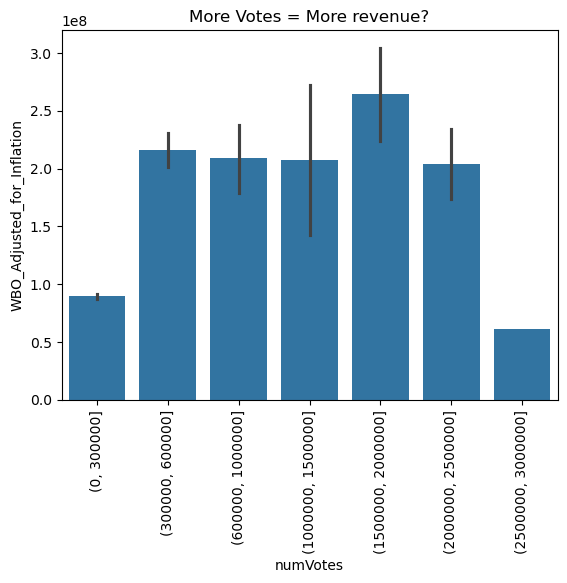

In [43]:
bins = [0,300000,600000,1000000,1500000,2000000,2500000,3000000]

sns.barplot(x=pd.cut(filtered_df['numVotes'], bins=bins, right=True),y=filtered_df['WBO_Adjusted_for_Inflation'], estimator = np.mean)
plt.xticks(rotation=90)
plt.title('More Votes = More revenue?')
plt.show()

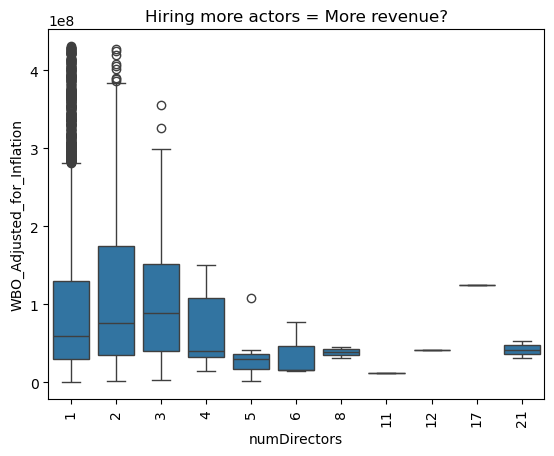

In [44]:
sns.boxplot(x='numDirectors',y='WBO_Adjusted_for_Inflation',data=filtered_df)
plt.xticks(rotation=90)
plt.title('Hiring more actors = More revenue?')
plt.show()

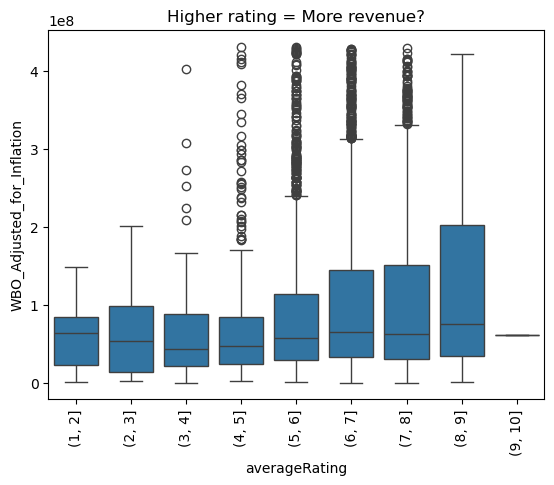

In [45]:
bins = [1,2,3,4,5,6,7,8,9,10]

sns.boxplot(x=pd.cut(filtered_df['averageRating'], bins=bins, right=True),y=filtered_df['WBO_Adjusted_for_Inflation'])
plt.xticks(rotation=90)
plt.title('Higher rating = More revenue?')
plt.show()

In [46]:
filtered_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer,Title,Year,Worldwide_Box_Office,WBO_Adjusted_for_Inflation,tot_act
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568,1,2,10.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,The Shawshank Redemption,1994,28343927.0,6.139749e+07,10.0
3,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350,1,2,7.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,2.0,Fight Club,1999,100853753.0,1.733413e+08,10.0
5,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,2213165,1,2,7.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,Pulp Fiction,1994,107968758.0,2.338777e+08,10.0
11,tt0114369,movie,Se7en,Se7en,0,1995,\N,127,"Crime,Drama,Mystery",8.6,1793469,1,1,9.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,Se7en,1995,100125643.0,2.236509e+08,10.0
15,tt0361748,movie,Inglourious Basterds,Inglourious Basterds,0,2009,\N,153,"Adventure,Drama,War",8.4,1579459,1,1,8.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,Inglourious Basterds,2009,321455689.0,3.045278e+08,10.0


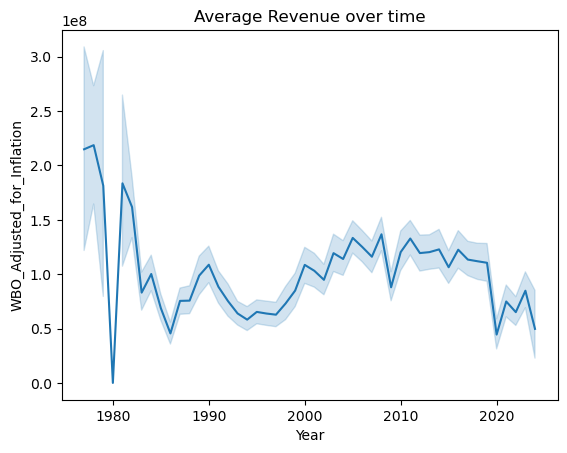

In [47]:
sns.lineplot(data = filtered_df[filtered_df['titleType'] == 'movie'], x = 'Year',y = 'WBO_Adjusted_for_Inflation', estimator = np.mean)
plt.title('Average Revenue over time')
plt.show()

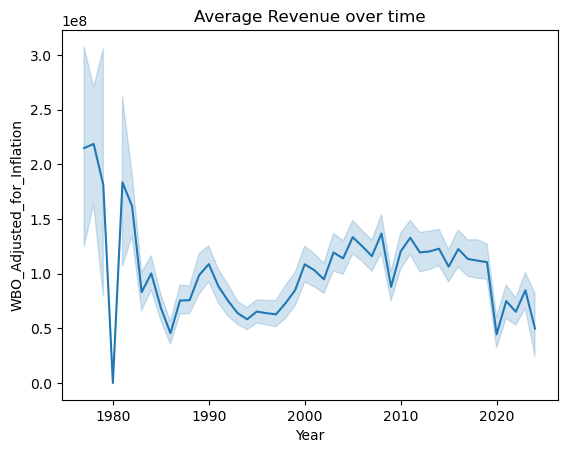

In [48]:
sns.lineplot(data = filtered_df[filtered_df['titleType'] == 'movie'], x = 'Year',y = 'WBO_Adjusted_for_Inflation', estimator = np.mean)
plt.title('Average Revenue over time')
plt.show()

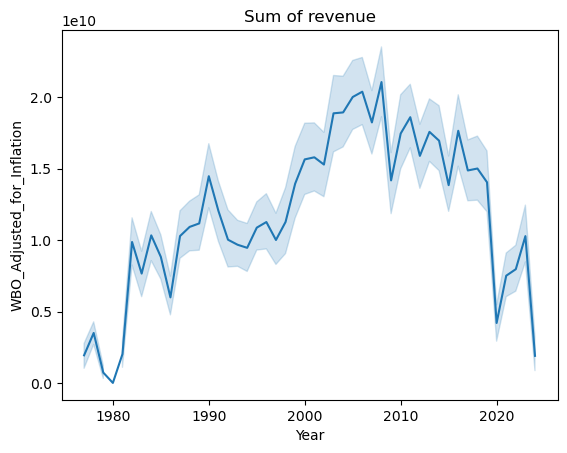

In [49]:
sns.lineplot(data = filtered_df[filtered_df['titleType'] == 'movie'], x = 'Year',y = 'WBO_Adjusted_for_Inflation', estimator = np.sum)
plt.title('Sum of revenue')
plt.show()

<Axes: xlabel='Year', ylabel='numDirectors'>

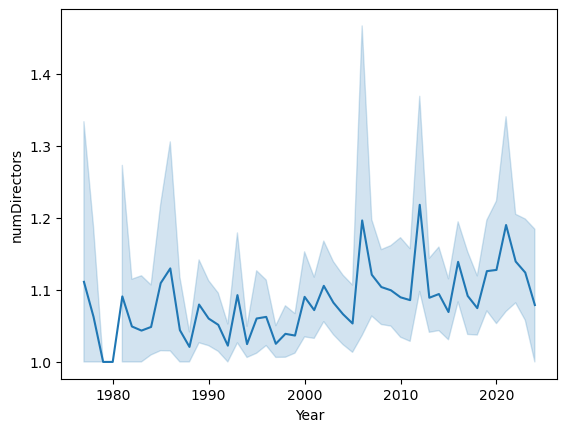

In [50]:
sns.lineplot(data = filtered_df[filtered_df['titleType'] == 'movie'], x = 'Year',y = 'numDirectors', estimator = np.mean)

<Axes: xlabel='Year', ylabel='tot_act'>

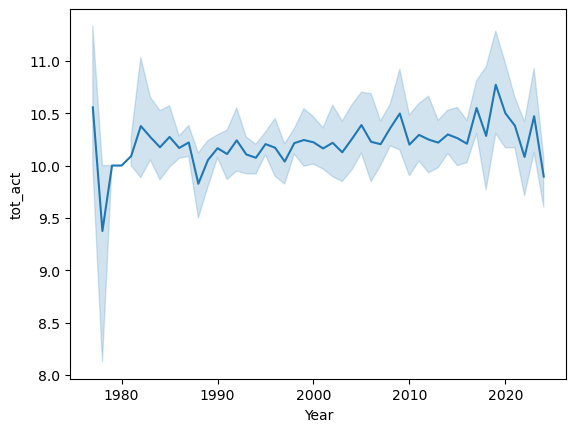

In [51]:
sns.lineplot(data = filtered_df[filtered_df['titleType'] == 'movie'], x = 'Year',y = 'tot_act', estimator = np.mean)

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_4984\1497941752.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_revenue = pd.concat([df_revenue, temp_df], ignore_index=True)
C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_4984\1497941752.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Year', y = 'Values', hue = 'Category',data = df_revenue[df_revenue['Category'].isin(top_5)], estimator=np.mean, ci=None)


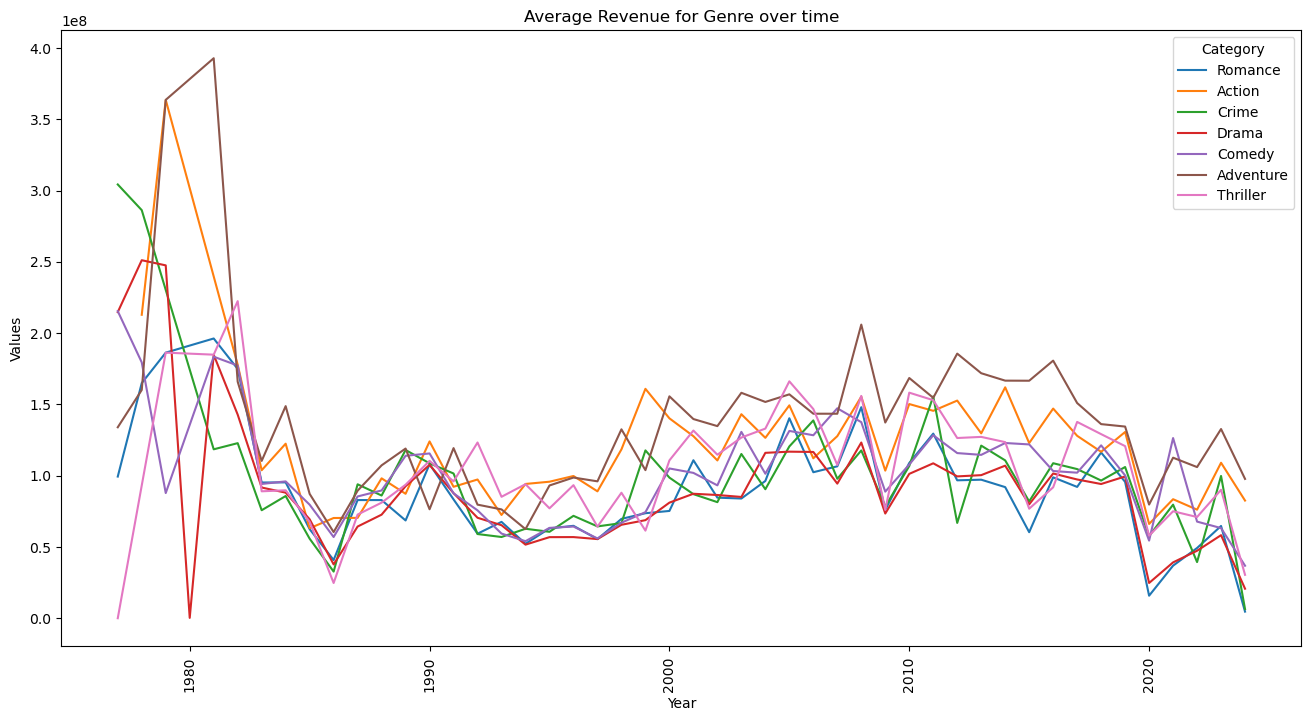

In [52]:
# Suppose we want to loop through these names and create a list for each
genres = set(sum(filtered_df['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary
lists_dict = {}
year_dict = {}

# Loop through the names and create an empty list for each, stored in the dictionary
for name in genres:
    lists_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['WBO_Adjusted_for_Inflation'].tolist()
    year_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['startYear'].tolist()

# Initialize an empty DataFrame
df_revenue = pd.DataFrame(columns=['Category', 'Values'])

# Populate the DataFrame
for key, values in lists_dict.items():
    temp_df = pd.DataFrame({'Category': key, 'Values': values})
    df_revenue = pd.concat([df_revenue, temp_df], ignore_index=True)

year = [value for sublist in year_dict.values() for value in sublist]

df_revenue['Year'] = year
top_5 = df_revenue.groupby('Category')['Values'].sum().reset_index().sort_values('Values', ascending=False).head(7)['Category']

plt.figure(figsize=(16,8))
sns.lineplot(x = 'Year', y = 'Values', hue = 'Category',data = df_revenue[df_revenue['Category'].isin(top_5)], estimator=np.mean, ci=None)
plt.xticks(rotation = 90)
plt.title('Average Revenue for Genre over time')
plt.show()

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_4984\565917669.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Year', y = 'Values', hue = 'Category',data = df_revenue[df_revenue['Category'].isin(top_5)], estimator=np.sum, ci=None)


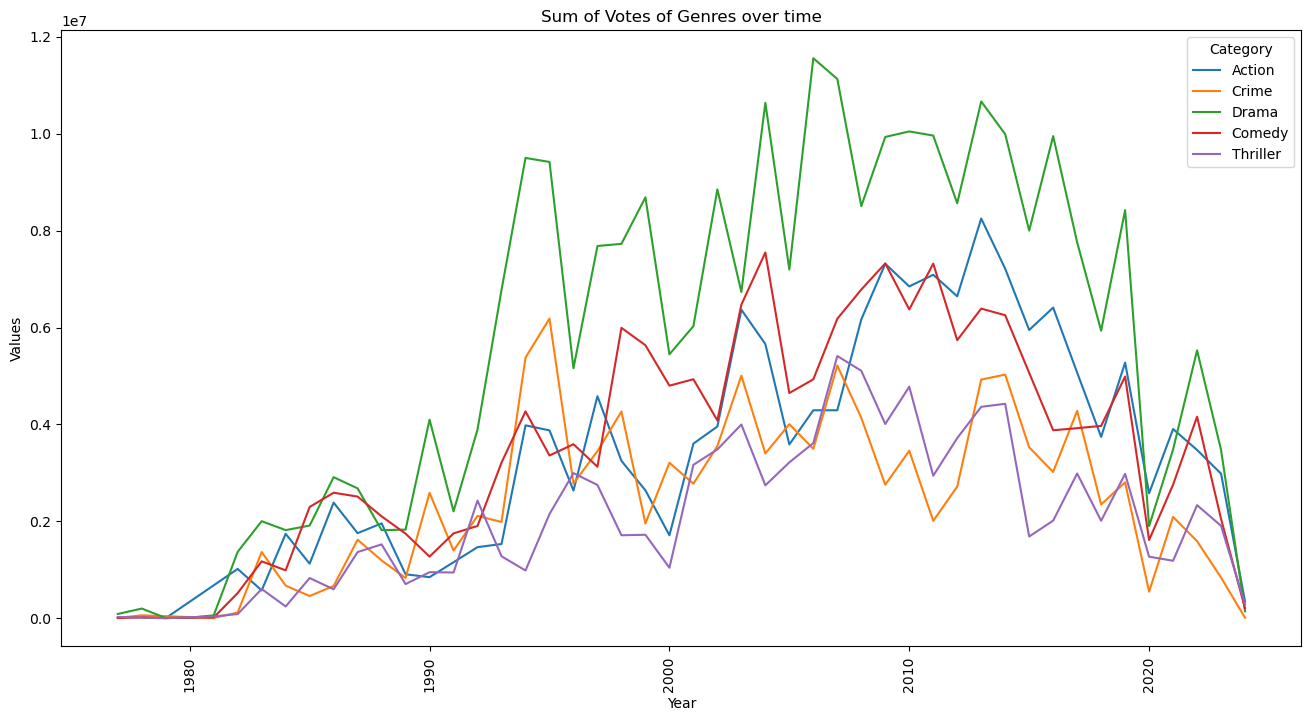

In [53]:
# Suppose we want to loop through these names and create a list for each
genres = set(sum(filtered_df['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary
lists_dict = {}
year_dict = {}

# Loop through the names and create an empty list for each, stored in the dictionary
for name in genres:
    lists_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['numVotes'].tolist()
    year_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['Year'].tolist()

# Initialize an empty DataFrame
df_revenue = pd.DataFrame(columns=['Category', 'Values'])

# Populate the DataFrame
for key, values in lists_dict.items():
    temp_df = pd.DataFrame({'Category': key, 'Values': values})
    df_revenue = pd.concat([df_revenue, temp_df], ignore_index=True)

year = [value for sublist in year_dict.values() for value in sublist]

df_revenue['Year'] = year
top_5 = df_revenue.groupby('Category')['Values'].sum().reset_index().sort_values('Values', ascending=False).head(5)['Category']

plt.figure(figsize=(16,8))
sns.lineplot(x = 'Year', y = 'Values', hue = 'Category',data = df_revenue[df_revenue['Category'].isin(top_5)], estimator=np.sum, ci=None)
plt.xticks(rotation = 90)
plt.title('Sum of Votes of Genres over time')
plt.show()

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_4984\1173689006.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_revenue = pd.concat([df_revenue, temp_df], ignore_index=True)
C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_4984\1173689006.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Year', y = 'Values', hue = 'Category',data = df_revenue[df_revenue['Category'].isin(top_5)], estimator=np.mean, ci=None)


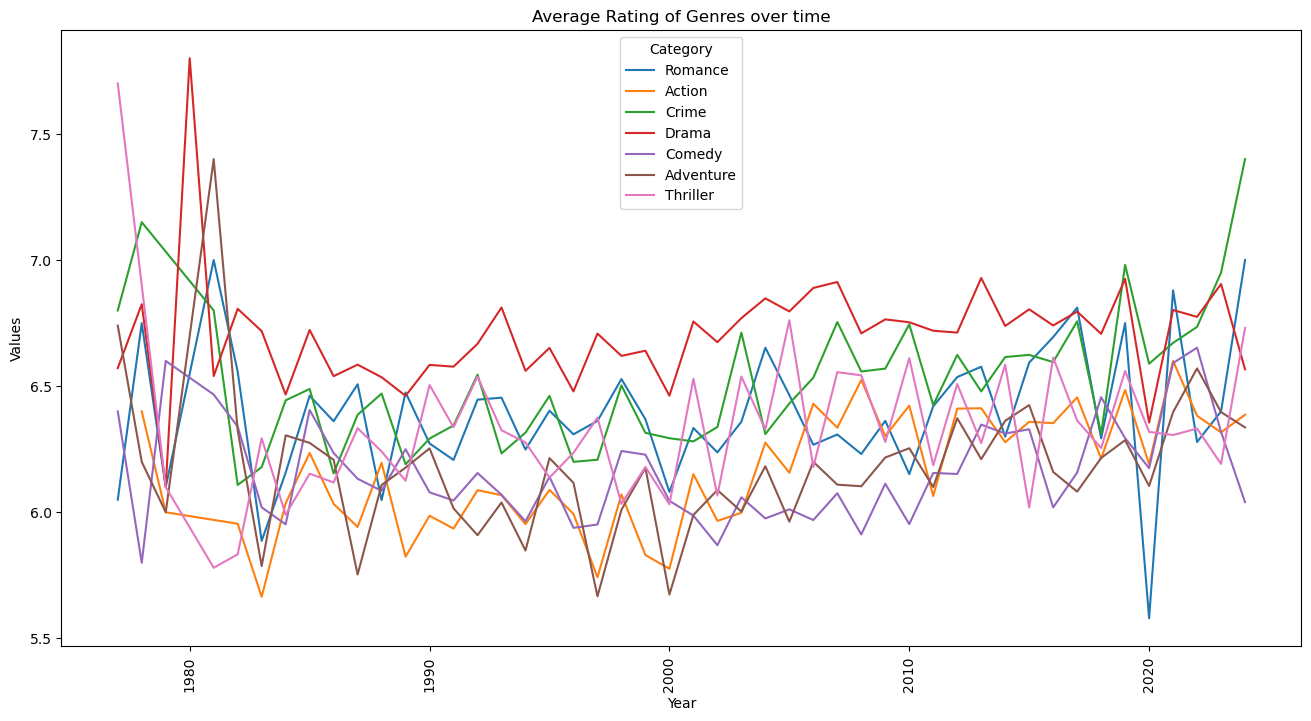

In [54]:
# Suppose we want to loop through these names and create a list for each
genres = set(sum(filtered_df['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary
lists_dict = {}
year_dict = {}

# Loop through the names and create an empty list for each, stored in the dictionary
for name in genres:
    lists_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['averageRating'].tolist()
    year_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['Year'].tolist()

# Initialize an empty DataFrame
df_revenue = pd.DataFrame(columns=['Category', 'Values'])

# Populate the DataFrame
for key, values in lists_dict.items():
    temp_df = pd.DataFrame({'Category': key, 'Values': values})
    df_revenue = pd.concat([df_revenue, temp_df], ignore_index=True)

year = [value for sublist in year_dict.values() for value in sublist]

df_revenue['Year'] = year
top_5 = df_revenue.groupby('Category')['Values'].sum().reset_index().sort_values('Values', ascending=False).head(7)['Category']

plt.figure(figsize=(16,8))
sns.lineplot(x = 'Year', y = 'Values', hue = 'Category',data = df_revenue[df_revenue['Category'].isin(top_5)], estimator=np.mean, ci=None)
plt.xticks(rotation = 90)
plt.title('Average Rating of Genres over time')
plt.show()

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_4984\1908949708.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'startYear', y = 'tot_act', data = filtered_df, estimator=np.mean, ci=None)


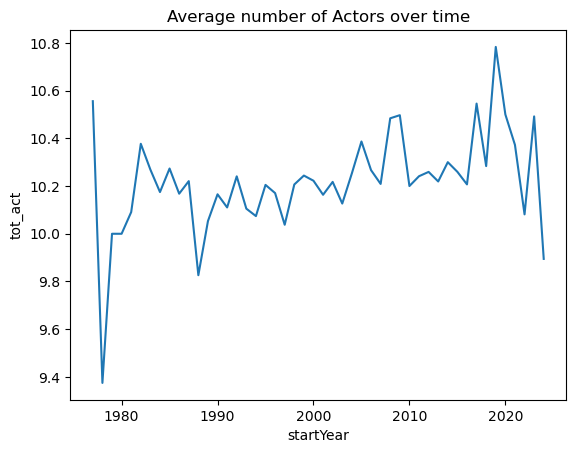

In [55]:
sns.lineplot(x = 'startYear', y = 'tot_act', data = filtered_df, estimator=np.mean, ci=None)
plt.title('Average number of Actors over time')
plt.show()

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_4984\592464608.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_long = pd.concat([df_long, temp_df], ignore_index=True)


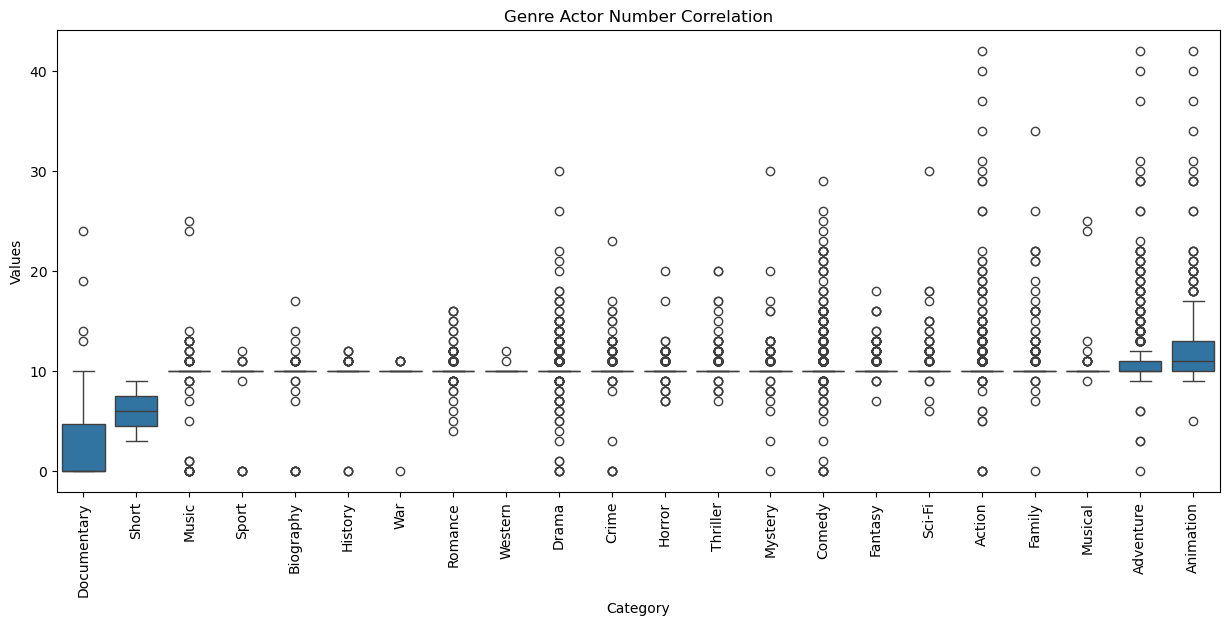

In [56]:
# Suppose we want to loop through these names and create a list for each
genres = set(sum(filtered_df['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary
lists_dict = {}

# Loop through the names and create an empty list for each, stored in the dictionary
for name in genres:
    lists_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['tot_act'].tolist()

# Initialize an empty DataFrame
df_long = pd.DataFrame(columns=['Category', 'Values'])

# Populate the DataFrame
for key, values in lists_dict.items():
    temp_df = pd.DataFrame({'Category': key, 'Values': values})
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

    # Calculate mean values for each category
mean_values = df_long.groupby('Category')['Values'].mean().reset_index()

# Sort the categories based on their mean values
sorted_categories = mean_values.sort_values('Values')['Category']

# Plot the boxplot with seaborn, ordering the categories by their mean values
plt.figure(figsize=(15, 6))  # Set figure size
sns.boxplot(x='Category', y='Values', data=df_long, order=sorted_categories)
plt.xticks(rotation=90)
plt.title('Genre Actor Number Correlation')
plt.show()

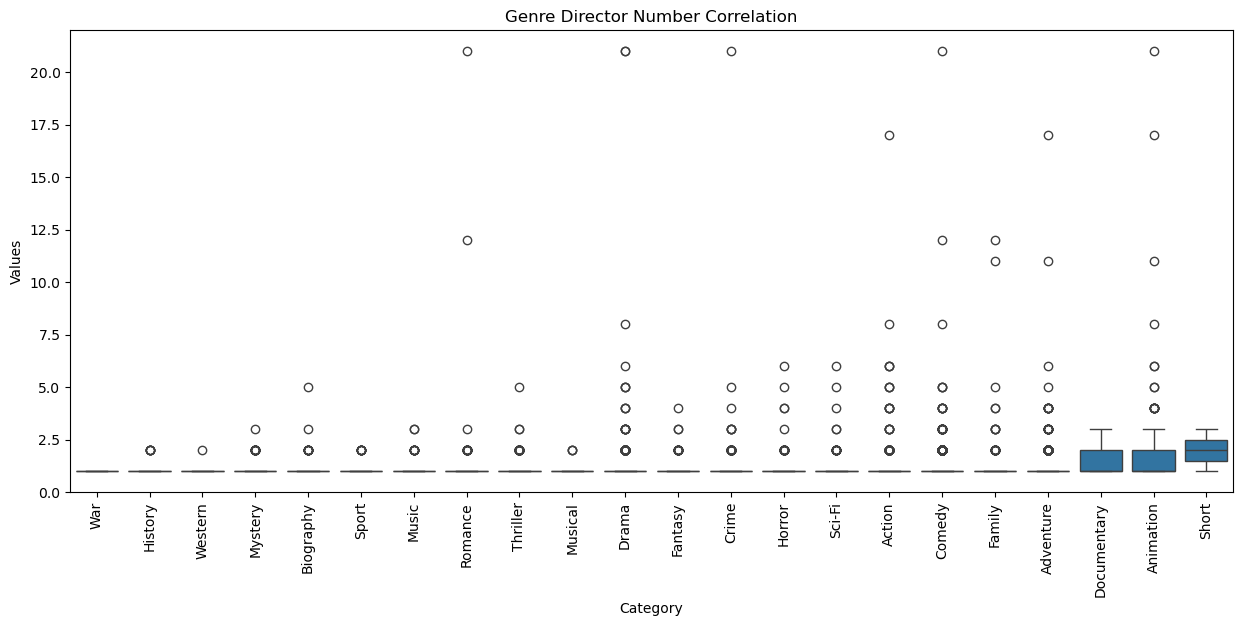

In [57]:
# Suppose we want to loop through these names and create a list for each
genres = set(sum(filtered_df['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary
lists_dict = {}

# Loop through the names and create an empty list for each, stored in the dictionary
for name in genres:
    lists_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['numDirectors'].tolist()

# Initialize an empty DataFrame
df_long = pd.DataFrame(columns=['Category', 'Values'])

# Populate the DataFrame
for key, values in lists_dict.items():
    temp_df = pd.DataFrame({'Category': key, 'Values': values})
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

    # Calculate mean values for each category
mean_values = df_long.groupby('Category')['Values'].mean().reset_index()

# Sort the categories based on their mean values
sorted_categories = mean_values.sort_values('Values')['Category']

# Plot the boxplot with seaborn, ordering the categories by their mean values
plt.figure(figsize=(15, 6))  # Set figure size
sns.boxplot(x='Category', y='Values', data=df_long, order=sorted_categories)
plt.xticks(rotation=90)
plt.title('Genre Director Number Correlation')
plt.show()

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_4984\1073588826.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_long = pd.concat([df_long, temp_df], ignore_index=True)


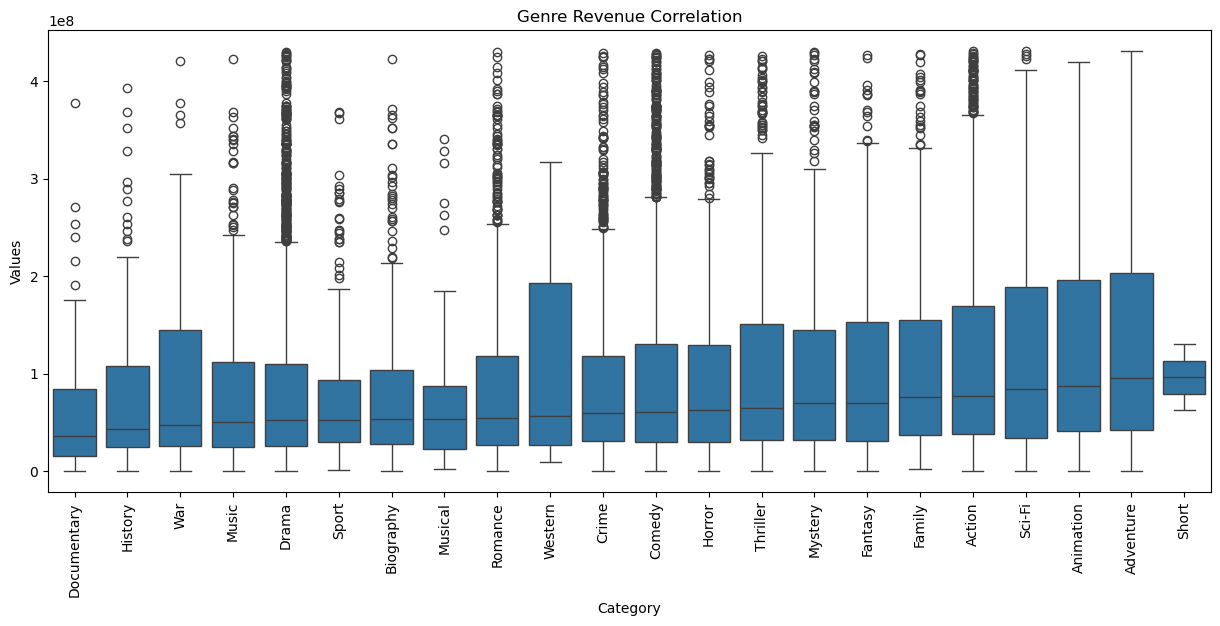

In [58]:
# Suppose we want to loop through these names and create a list for each
genres = set(sum(filtered_df['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary
lists_dict = {}

# Loop through the names and create an empty list for each, stored in the dictionary
for name in genres:
    lists_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['WBO_Adjusted_for_Inflation'].tolist()

# Initialize an empty DataFrame
df_long = pd.DataFrame(columns=['Category', 'Values'])

# Populate the DataFrame
for key, values in lists_dict.items():
    temp_df = pd.DataFrame({'Category': key, 'Values': values})
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

    # Calculate mean values for each category
mean_values = df_long.groupby('Category')['Values'].median().reset_index()

# Sort the categories based on their mean values
sorted_categories = mean_values.sort_values('Values')['Category']

# Plot the boxplot with seaborn, ordering the categories by their mean values
plt.figure(figsize=(15, 6))  # Set figure size
sns.boxplot(x='Category', y='Values', data=df_long, order=sorted_categories)
plt.xticks(rotation=90)
plt.title('Genre Revenue Correlation')
plt.show()

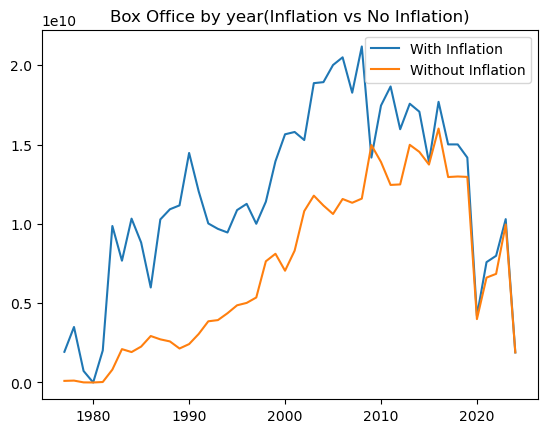

In [59]:
plt.plot(filtered_df.groupby(['Year'])['WBO_Adjusted_for_Inflation'].sum(), label = 'With Inflation')
plt.plot(filtered_df.groupby(['Year'])['Worldwide_Box_Office'].sum(), label = 'Without Inflation')
plt.title('Box Office by year(Inflation vs No Inflation)')
plt.legend()
plt.show()

In [60]:
actor = cast_and_crew[cast_and_crew['category']=='actor']
actor = actor[actor['birthYear']!='\\N']
actor['birthYear'] = actor['birthYear'].astype('int')
average_birth_year = actor.groupby(['tconst'])['birthYear'].mean().reset_index()
crew_box_movie = pd.merge(filtered_df,average_birth_year,on='tconst', how='inner')
crew_box_movie['act_avg_age'] = (crew_box_movie['startYear'] - crew_box_movie['birthYear']).round(0)

In [61]:
crew_box_movie.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer,Title,Year,Worldwide_Box_Office,WBO_Adjusted_for_Inflation,tot_act,birthYear,act_avg_age
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568,1,2,10.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,The Shawshank Redemption,1994,28343927.0,6.139749e+07,10.0,1948.800000,45.0
1,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350,1,2,7.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,2.0,Fight Club,1999,100853753.0,1.733413e+08,10.0,1956.666667,42.0
2,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,2213165,1,2,7.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,Pulp Fiction,1994,107968758.0,2.338777e+08,10.0,1959.000000,35.0
3,tt0114369,movie,Se7en,Se7en,0,1995,\N,127,"Crime,Drama,Mystery",8.6,1793469,1,1,9.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,Se7en,1995,100125643.0,2.236509e+08,10.0,1954.857143,40.0
4,tt0361748,movie,Inglourious Basterds,Inglourious Basterds,0,2009,\N,153,"Adventure,Drama,War",8.4,1579459,1,1,8.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,Inglourious Basterds,2009,321455689.0,3.045278e+08,10.0,1969.000000,40.0


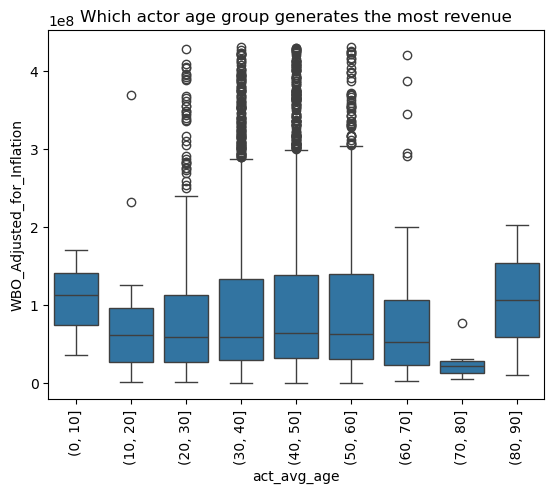

In [62]:
bins = [0,10,20,30,40,50,60,70,80,90]

sns.boxplot(x=pd.cut(crew_box_movie['act_avg_age'], bins=bins, right=True),y=crew_box_movie['WBO_Adjusted_for_Inflation'])
plt.xticks(rotation=90)
plt.title('Which actor age group generates the most revenue')
plt.show()